In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [42]:
def combine_historical_and_predicted(historical, prediction):
    """
    Concatenates historical and predicted time series data and 
    adds additional columns: datetime, year, weekday, sum.
    Returns a DataFrame.
    """
    historical["predicted"] = False
    prediction["predicted"] = True
    combined = pd.concat([historical, prediction])
    combined.date = combined.date.apply(pd.to_datetime)
    combined["year"] = combined.date.apply(lambda date: date.year)
    combined["datetime"] = combined.apply(lambda row: row.date + timedelta(hours=int(row.hour[:2])), axis=1)
    combined["week"] = combined.date.apply(lambda date: date.isocalendar()[1])
    combined["weekday"] = combined.date.apply(lambda date: date.weekday())
    combined.sort_values(by="datetime", inplace=True)
    combined.reset_index(drop=True, inplace=True)
    return combined

In [34]:
# import ts datasets from csv files
historical = pd.read_csv("historical_ts.csv")
prediction = pd.read_csv("prediction_ts.csv")

In [43]:
# combine the historical and predicted datasets
combined = combine_historical_and_predicted(historical, prediction)

In [3]:
midsummers.date = midsummers.date.apply(pd.to_datetime)
midsummers["year"] = midsummers.date.apply(lambda date: date.year)
midsummers["datetime"] = midsummers.apply(lambda row: row.date + timedelta(hours=int(row.hour[:2])), axis=1)

predicted.date = predicted.date.apply(pd.to_datetime)
predicted["year"] = predicted.date.apply(lambda date: date.year)
predicted["datetime"] = predicted.apply(lambda row: row.date + timedelta(hours=int(row.hour[:2])), axis=1)

combined = pd.concat([midsummers, predicted])

combined["weekday"] = combined.date.apply(lambda date: date.weekday())
combined = combined[(combined.weekday >= 3) & (combined.weekday <= 6) & (combined.year >= 2017)]
combined = combined.iloc[::2, :]

In [41]:
combined.tail()

,date,hour,LAM Station,Cars and Vans - 1,Cars and Vans - 2,Trucks - 1,Trucks - 2,Buses - 1,Buses - 2,predicted,year,datetime,weekday
191515,2018-09-27,22-23,Mäntsälä,205.6,138.0,6.2,3.6,1.8,0.9,True,2018,2018-09-27 22:00:00,3
191516,2018-09-27,22-23,Kemijärvi,2.9,2.3,0.0,0.0,0.0,0.0,True,2018,2018-09-27 22:00:00,3
191517,2018-09-27,23-24,Askisto,157.1,317.0,8.0,8.1,1.8,2.8,True,2018,2018-09-27 23:00:00,3
191518,2018-09-27,23-24,Kemijärvi,2.6,1.2,0.0,0.0,0.0,0.0,True,2018,2018-09-27 23:00:00,3
191519,2018-09-27,23-24,Mäntsälä,110.5,60.7,5.6,3.6,1.3,1.9,True,2018,2018-09-27 23:00:00,3


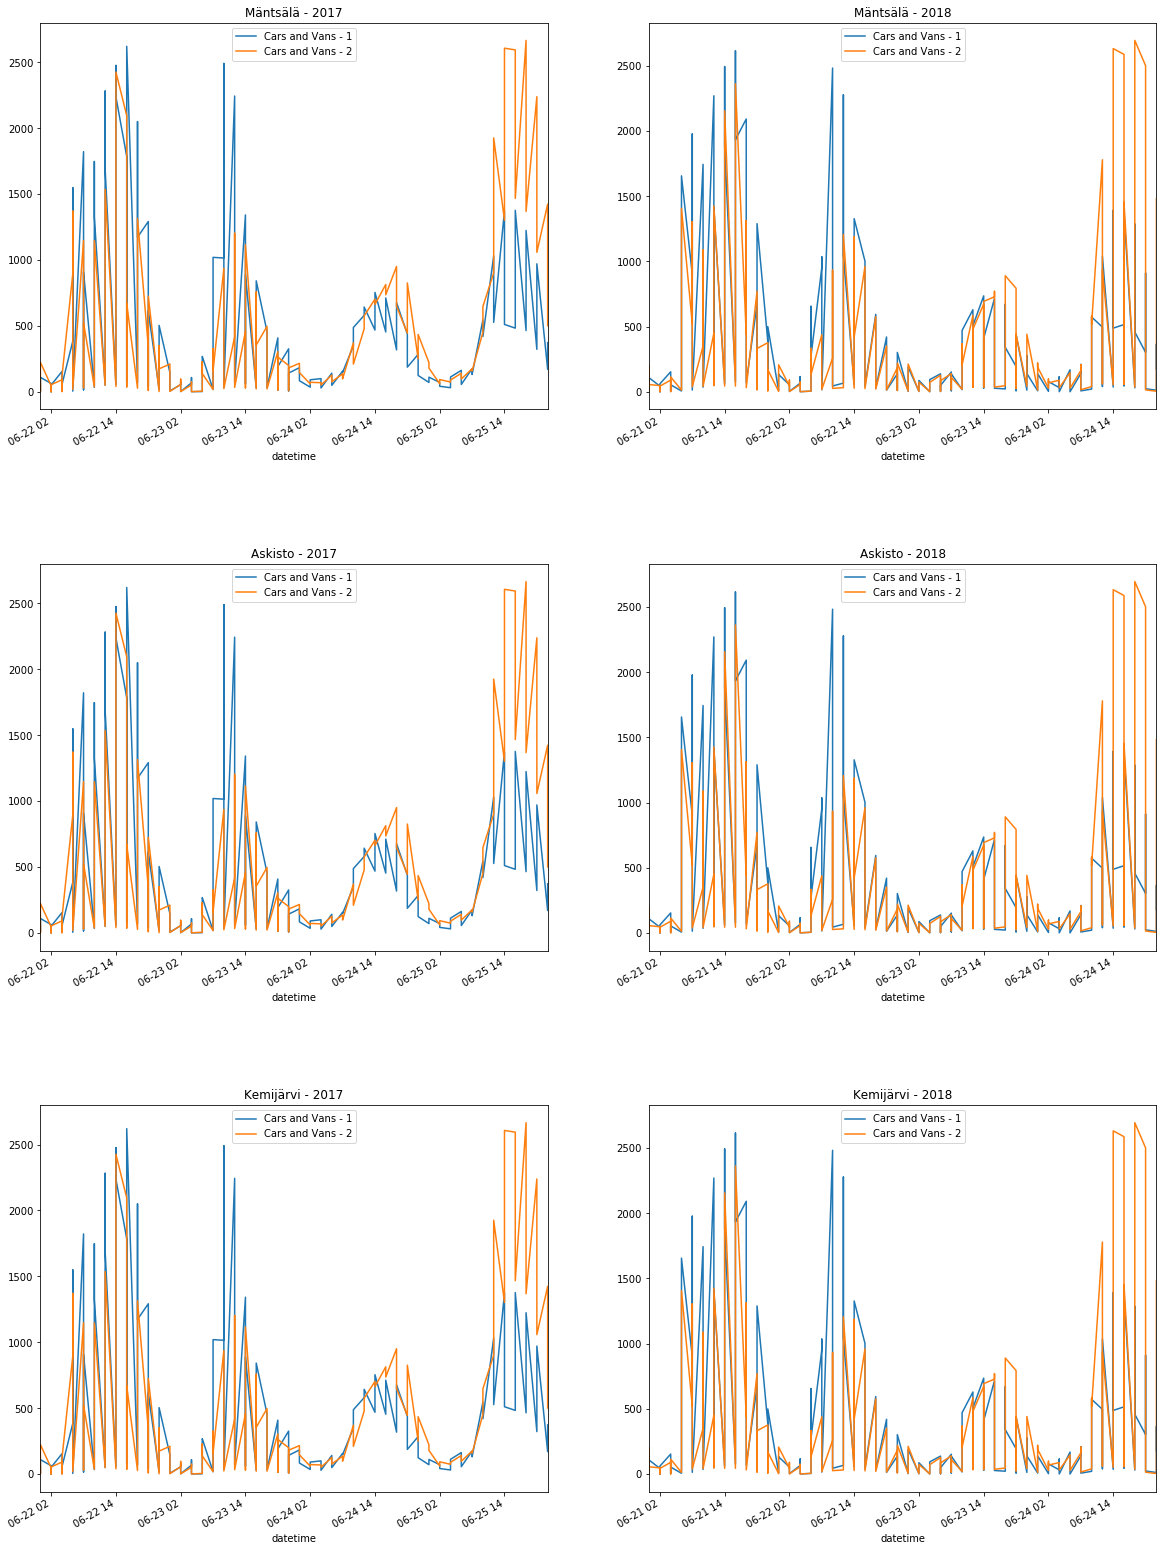

In [5]:
years = combined.year.unique()
locations = combined["LAM Station"].unique()

fig, ax = plt.subplots(nrows=len(locations), ncols=len(years), figsize=(20, 30))
plt.subplots_adjust(hspace = 0.4)

i = 0
for year in years:
    j = 0
    for location in locations:
        axis = ax[j][i]
        axis.set_title(location + " - {}".format(year))
        combined[combined.year == year][["datetime", "Cars and Vans - 1", "Cars and Vans - 2"]].plot(x="datetime", ax=axis)
        j += 1
    i += 1